Sample bids file 'bids.txt' generated with 5 advertisers.
VCG Revenue without manipulation: $73
VCG Revenue with manipulation: $74
Alternative Mechanism Revenue: $43
Is the alternative mechanism's revenue at least half of VCG's revenue? Yes


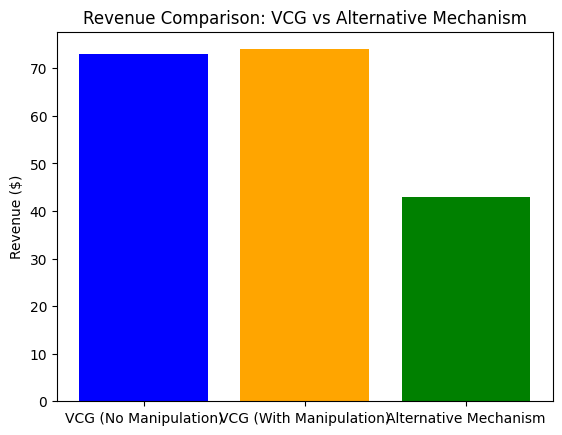

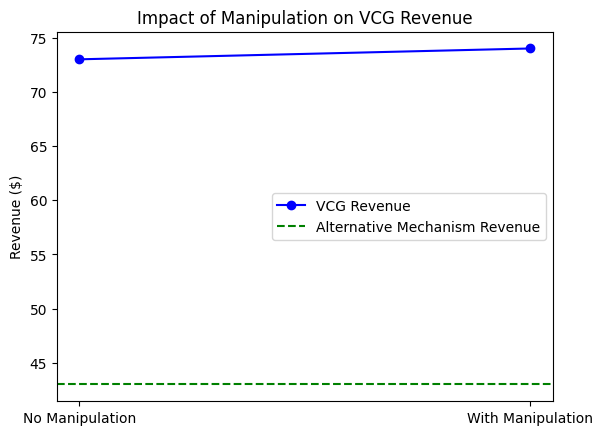

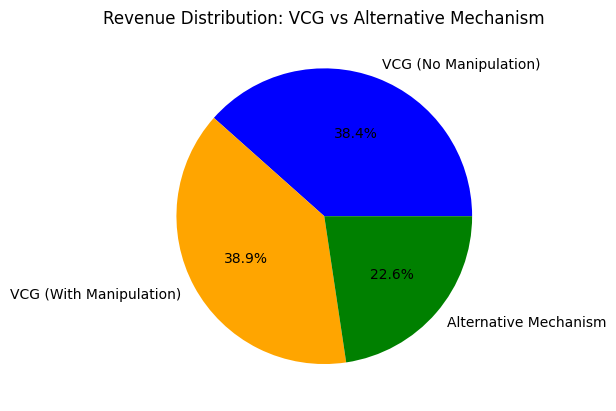

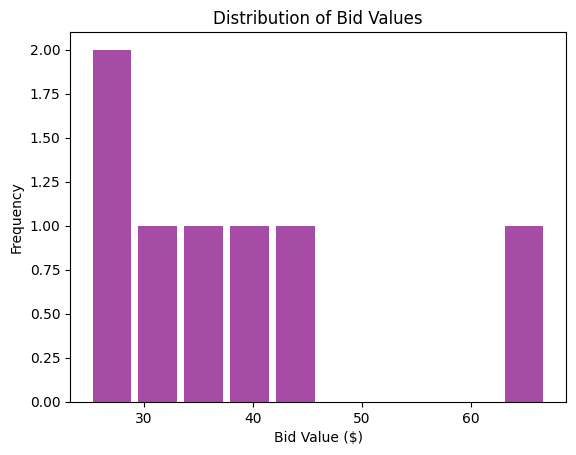

In [16]:
import random
import matplotlib.pyplot as plt

# Function to generate a sample 'bids.txt' file and save it
def generate_sample_bids_file(filename='bids.txt', num_advertisers=5):
    targets = ['top', 'sidebar', 'both']  # Available ad slots
    bids = {'top': [], 'sidebar': [], 'both': []}

    with open(filename, 'w') as file:
        for i in range(1, num_advertisers + 1):
            advertiser = f"Advertiser{i}"
            bid_amount = random.randint(20, 100)  # Random bid amount between 20 and 100
            target = random.choice(targets)  # Randomly choose an ad slot (top, sidebar, or both)
            bids[target].append((advertiser, bid_amount))
            file.write(f"{advertiser} {bid_amount} {target}\n")  # Save the bids to a .txt file

    print(f"Sample bids file '{filename}' generated with {num_advertisers} advertisers.")
    return bids

# VCG Revenue Calculation Function
def calculate_vcg_revenue(bids):
    # Sorting bids for each space (top, sidebar, both) by the bid amount (descending)
    top_bids = sorted(bids['top'], key=lambda x: x[1], reverse=True)
    sidebar_bids = sorted(bids['sidebar'], key=lambda x: x[1], reverse=True)
    both_bids = sorted(bids['both'], key=lambda x: x[1], reverse=True)

    # If no bids, set the highest bid to 0
    v1t = top_bids[0][1] if top_bids else 0  # highest bid for top banner
    v2t = top_bids[1][1] if len(top_bids) > 1 else 0  # second-highest bid for top banner
    v1s = sidebar_bids[0][1] if sidebar_bids else 0  # highest bid for sidebar
    v2s = sidebar_bids[1][1] if len(sidebar_bids) > 1 else 0  # second-highest bid for sidebar
    v1b = both_bids[0][1] if both_bids else 0  # highest bid for both spaces
    v2b = both_bids[1][1] if len(both_bids) > 1 else 0  # second-highest bid for both spaces

    # Auctioneer breaks ties in favor of bidders who want both slots
    # Determine who gets the top and sidebar spaces, and the corresponding payments
    if v1b > max(v1t, v1s):
        # Both spaces go to the highest 'both' bidder
        payment = v2b  # payment is the second-highest bid for 'both'
    else:
        # Top goes to highest top bidder, sidebar goes to highest sidebar bidder
        top_winner_payment = v2t
        sidebar_winner_payment = v2s
        payment = top_winner_payment + sidebar_winner_payment  # total revenue from both

    return payment

# Alternative Auction Mechanism Function
def alternative_mechanism_revenue(bids):
    # Merge all bids from top, sidebar, and both into a single list
    all_bids = bids['top'] + bids['sidebar'] + bids['both']

    # Sort all bids by bid amount in descending order
    all_bids_sorted = sorted(all_bids, key=lambda x: x[1], reverse=True)

    # Find the highest bid (winner) and second-highest bid (payment)
    highest_bid = all_bids_sorted[0][1] if all_bids_sorted else 0
    second_highest_bid = all_bids_sorted[1][1] if len(all_bids_sorted) > 1 else 0

    # The revenue is the second-highest bid (since we charge the second-highest price)
    return second_highest_bid

# Function to simulate manipulation by submitting multiple identities
def simulate_vcg_with_manipulation(bids, fake_bids=None, alpha=0):
    original_bids = bids.copy()  # Keep a copy of original bids for comparison

    # Add the fake bids to the bidding scenario, if provided
    if fake_bids:
        for space, fake_bid_list in fake_bids.items():
            bids[space].extend(fake_bid_list)

    # Calculate the revenue with the fake bids
    revenue_with_fake = calculate_vcg_revenue(bids)

    # Assume agent pays an additional small cost alpha for creating a fake identity
    total_payment = revenue_with_fake + alpha

    return total_payment, original_bids

# Function to visualize and compare revenues using multiple plot types
def visualize_results(revenue_no_fake, revenue_with_fake, alt_revenue, bids):
    # Data for the charts
    labels = ['VCG (No Manipulation)', 'VCG (With Manipulation)', 'Alternative Mechanism']
    revenues = [revenue_no_fake, revenue_with_fake, alt_revenue]

    # Bar Chart: Compare Revenues
    fig, ax = plt.subplots()
    ax.bar(labels, revenues, color=['blue', 'orange', 'green'])
    ax.set_ylabel('Revenue ($)')
    ax.set_title('Revenue Comparison: VCG vs Alternative Mechanism')
    plt.show()

    # Line Plot: Change in Revenue Due to Manipulation
    plt.figure()
    plt.plot(['No Manipulation', 'With Manipulation'], [revenue_no_fake, revenue_with_fake], marker='o', color='blue', label='VCG Revenue')
    plt.axhline(y=alt_revenue, color='green', linestyle='--', label='Alternative Mechanism Revenue')
    plt.title('Impact of Manipulation on VCG Revenue')
    plt.ylabel('Revenue ($)')
    plt.legend()
    plt.show()

    # Pie Chart: Percentage Contribution of Each Mechanism to Total Revenue
    total_revenue = revenue_no_fake + revenue_with_fake + alt_revenue
    revenue_percentages = [revenue_no_fake / total_revenue, revenue_with_fake / total_revenue, alt_revenue / total_revenue]
    plt.figure()
    plt.pie(revenue_percentages, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange', 'green'])
    plt.title('Revenue Distribution: VCG vs Alternative Mechanism')
    plt.show()

    # Histogram: Distribution of Bid Values
    bid_values = []
    for space in bids:
        for bid in bids[space]:
            bid_values.append(bid[1])

    plt.figure()
    plt.hist(bid_values, bins=10, color='purple', alpha=0.7, rwidth=0.85)
    plt.title('Distribution of Bid Values')
    plt.xlabel('Bid Value ($)')
    plt.ylabel('Frequency')
    plt.show()

# Function to run the test and visualize results
def run_test_and_visualize():
    # Generate and save the sample bids file
    bids_without_fake = generate_sample_bids_file('bids.txt', num_advertisers=5)  # You can adjust the number of advertisers

    # Fake identity bids (can also be generated dynamically or manually created)
    fake_bids = {
        'top': [('Fake Advertiser', 30)],  # Fake bid for top banner
        'sidebar': [('Fake Advertiser', 25)]  # Fake bid for sidebar
    }

    # Small cost (alpha) for creating a second identity
    alpha = 1  # Cost for creating a fake identity

    # Simulate VCG without manipulation
    revenue_no_fake = calculate_vcg_revenue(bids_without_fake)

    # Simulate VCG with manipulation (Advertiser 3 uses a fake identity)
    revenue_with_fake, original_bids = simulate_vcg_with_manipulation(bids_without_fake, fake_bids, alpha)

    # Calculate revenue using the alternative auction mechanism (Part C)
    alt_revenue = alternative_mechanism_revenue(bids_without_fake)

    # Print the results for reference
    print(f"VCG Revenue without manipulation: ${revenue_no_fake}")
    print(f"VCG Revenue with manipulation: ${revenue_with_fake}")
    print(f"Alternative Mechanism Revenue: ${alt_revenue}")

    # Add the missing line: Check if alternative revenue is at least half of VCG
    print(f"Is the alternative mechanism's revenue at least half of VCG's revenue? {'Yes' if alt_revenue >= revenue_no_fake / 2 else 'No'}")

    # Call the visualization function to display the comparison
    visualize_results(revenue_no_fake, revenue_with_fake, alt_revenue, bids_without_fake)

# Example usage:
run_test_and_visualize()
